# Read Data

In [1]:
pid_list = list(range(1,19))
drivingData = {}
for pid in pid_list:
    drivingData[pid] = {}
    for attempt in range(1, 7):
        fileName = '../Driving/roadData/' + str(pid) + '-' + str(attempt) + '/carData_track0.txt'
        try:
            with open(fileName, 'r') as f:
                page = f.read().split('\n')
                start, finish = int(page[4].split(':')[0]), int(page[-2].split(':')[0])
                drivingData[pid][attempt] = [start, finish]
        except:
            print('Error: file {} not found!'.format(fileName))
drivingData

{1: {1: [1658527802096, 1658527932091],
  2: [1658527972870, 1658528098097],
  3: [1658528193635, 1658528318329],
  4: [1658528350859, 1658528481956],
  5: [1658528545267, 1658528675564],
  6: [1658528767025, 1658528895724]},
 2: {1: [1658786837269, 1658786962390],
  2: [1658786998051, 1658787126970],
  3: [1658787364091, 1658787456851],
  4: [1658787522665, 1658787643020],
  5: [1658787777075, 1658787885984],
  6: [1658787920434, 1658788049273]},
 3: {1: [1658693759752, 1658693885501],
  2: [1658694003602, 1658694134196],
  3: [1658694261106, 1658694390019],
  4: [1658694424081, 1658694551092],
  5: [1658694773820, 1658694909107],
  6: [1658694937823, 1658695072324]},
 4: {1: [1659047096193, 1659047230296],
  2: [1659047261703, 1659047372980],
  3: [1659047665314, 1659047788034],
  4: [1659047819530, 1659047927794],
  5: [1659047962192, 1659048083774],
  6: [1659048120737, 1659048246973]},
 5: {1: [1658687035112, 1658687176937],
  2: [1658687227636, 1658687363749],
  3: [1658687516077

In [2]:
fileName = 'eye_data.txt'
try:
    with open(fileName, 'r') as f:
        eyeData = f.read().split('\n')
except:
    print('Error: file {} not found!'.format(fileName))
eyeData = [line.split(', ') for line in eyeData]
eyeData = [[int(line[0]), int(line[1])] for line in eyeData]
eyeData

[[6, 1658499618694],
 [6, 1658499618757],
 [6, 1658499619621],
 [6, 1658499660941],
 [6, 1658499662874],
 [6, 1658499663006],
 [6, 1658499663075],
 [6, 1658499663271],
 [6, 1658499663340],
 [6, 1658499663474],
 [6, 1658499664136],
 [6, 1658499664471],
 [6, 1658499665602],
 [6, 1658499665803],
 [6, 1658499666007],
 [6, 1658499666138],
 [6, 1658499666202],
 [6, 1658499666270],
 [6, 1658499666472],
 [6, 1658499666605],
 [6, 1658499670338],
 [6, 1658499681267],
 [6, 1658499693988],
 [6, 1658499694059],
 [6, 1658499694127],
 [6, 1658499828790],
 [6, 1658499828860],
 [6, 1658499844453],
 [6, 1658499851254],
 [6, 1658499851318],
 [6, 1658499851785],
 [6, 1658499852051],
 [6, 1658499852182],
 [6, 1658499859516],
 [6, 1658499863715],
 [6, 1658499863779],
 [6, 1658499863848],
 [6, 1658499866444],
 [6, 1658499866513],
 [6, 1658499866583],
 [6, 1658499866646],
 [6, 1658499866716],
 [6, 1658499866778],
 [6, 1658499866911],
 [6, 1658499867044],
 [6, 1658499867113],
 [6, 1658499867177],
 [6, 16584998

# Functions

In [3]:
def get_interval_data(eye_data, start_time, finish_time):
    data = []
    for line in eyeData:
#         print(line)
        pid, time = line[0], line[1]
        if time > finish_time:
            return data
        elif time > start_time:
            data.append(line)
    return data

In [4]:
def get_glances(data):
    glances = []
    threshold = 500
    for i in range(len(data)):
        pid, time = data[i][0], data[i][1]
        if i == 0:
            start = time
            previous_time = time
            continue
        differnce = time - previous_time
        if differnce > threshold:
            glances.append(previous_time - start)
            start = time
        previous_time = time
    if len(data) != 0:
        glances.append(previous_time - start)
    return glances

In [5]:
def filter_glances(glances):
    filtered_glances = []
    min_glance_threshold, max_glance_threshold = 250, 1000
    for glance in glances:
        if glance >= min_glance_threshold and glance < max_glance_threshold:
            filtered_glances.append(glance)
    return filtered_glances

# Count, Analyze, Filter

In [6]:
rows = []
info = {}
for pid in pid_list:
    info[pid] = {'Tap': [], 'Swipe': [], 'Air': []}
    for attempt in range(1, 7):
        timestamps = drivingData[pid][attempt]
        data = get_interval_data(eyeData, timestamps[0], timestamps[1])
        glances = get_glances(data)
        glances = filter_glances(glances)
        block = -(attempt%2) + 2
        # tap
        if (pid % 6 in [0, 3] and attempt in [1, 2]) or (pid % 6 in [1, 5] and attempt in [3, 4]) or (pid % 6 in [2, 4] and attempt in [5, 6]):
            rows.append([pid, 'Tap', block, len(glances)])
        # swipe
        if (pid % 6 in [2, 5] and attempt in [1, 2]) or (pid % 6 in [0, 4] and attempt in [3, 4]) or (pid % 6 in [1, 3] and attempt in [5, 6]):
            rows.append([pid, 'Swipe', block, len(glances)])
        # air
        if (pid % 6 in [1, 4] and attempt in [1, 2]) or (pid % 6 in [2, 3] and attempt in [3, 4]) or (pid % 6 in [0, 5] and attempt in [5, 6]):
            rows.append([pid, 'Air', block, len(glances)])
import pandas as pd
df = pd.DataFrame(rows, columns = ['PID', 'Method', 'Block', 'Glance'])
df['Method'] = pd.CategoricalIndex(df['Method'], ordered=True, categories=list(info[pid].keys()))
df = df.sort_values(by = ['PID', 'Method', 'Block'])
df = df.replace('Air', 'MIDAIR')
df = df.replace('Tap', 'TAP')
df = df.replace('Swipe', 'SWIPE')
df

,PID,Method,Block,Glance
2,1,TAP,1,22
3,1,TAP,2,24
4,1,SWIPE,1,16
5,1,SWIPE,2,27
0,1,MIDAIR,1,0
...,...,...,...,...
103,18,TAP,2,12
104,18,SWIPE,1,2
105,18,SWIPE,2,6
106,18,MIDAIR,1,1


In [7]:
new_modes = ['TAP', 'SWIPE', 'MIDAIR']
for mode in new_modes:
    tm = round(df[df['Method'] == mode]['Glance'].mean(), 1)
    print(mode, tm)

TAP 10.1
SWIPE 6.4
MIDAIR 3.7


In [8]:
# rdf = pd.read_csv('../data.csv')
# ndf = pd.concat([rdf, df[['Glance']]], axis=1)
# ndf.to_csv('../data.csv', index=False)
# ndf
df.to_csv('../eyeData.csv', index=False)
df

,PID,Method,Block,Glance
2,1,TAP,1,22
3,1,TAP,2,24
4,1,SWIPE,1,16
5,1,SWIPE,2,27
0,1,MIDAIR,1,0
...,...,...,...,...
103,18,TAP,2,12
104,18,SWIPE,1,2
105,18,SWIPE,2,6
106,18,MIDAIR,1,1


In [13]:
def remove_outliers(org_df, column):
    import numpy as np
    data = org_df.loc[:,column]
    df = org_df.copy()
    # std
#     datalist = data.tolist()
#     import statistics
#     mu, std = statistics.mean(datalist), statistics.stdev(datalist)
#     max_val = mu + 3*std
#     min_val = mu - 3*std
    # quarters
    q75, q25 = np.percentile(data,[75,25])
    intr_qr = q75-q25
    max_val = q75+(1.5*intr_qr)
    min_val = q25-(1.5*intr_qr)
    # filter
    df.loc[org_df[column] < min_val, column] = 'OL'
    df.loc[org_df[column] > max_val, column] = 'OL'
    return df[df[column] != 'OL']

## Visualization

In [11]:
def plot_and_save(df, x_parameter, y_parameter, x_label, y_label, title):
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    sns.set_theme(style="whitegrid")
    sns.set(rc = {'figure.figsize':(15,8)})
    sns.set(font_scale = 2)

    fig, ax = plt.subplots(figsize=(15,8))
    ax = sns.barplot(x=x_parameter, y=y_parameter, data=df, capsize=.2)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    fig.savefig('Figs/'+title+".png")
    
    plt.show()

In [12]:
def factorize_xticks(ax):
    labels = []
    for label in ax.xaxis.get_ticklabels():
        # label.set_text(wrap_factor(label.get_text()))
        # label.set_usetex(True)
        label.set_text(label.get_text().upper())
        labels += [label]
    ax.xaxis.set_ticklabels(labels)

In [17]:
def cute_plot(df, x_label, x_label_name, x_order, y_label, y_label_name, y_bounds, title, duality, legend_position, fontsize):
    import seaborn as sns
    import matplotlib
    import matplotlib.pyplot as plt
    reg_palette = sns.color_palette("colorblind", 5)
    sns.set_palette(reg_palette)
    light_palette = [sns.set_hls_values(x, l=0.65) for x in reg_palette]
    sns.set_style("whitegrid")
    sns.set(font_scale = 1.2)
    
    fig = plt.figure()
    fig.set_figwidth(6)
    fig.set_figheight(4)
    gs = fig.add_gridspec(ncols=1, nrows=1, wspace=0.1)
    ax = fig.add_subplot(gs[0, 0])
    patches = []
    if duality:
        for metric, palette in [("Selection Time", reg_palette), ("Response Time", light_palette)]:
            ax = sns.barplot(data=df, x=x_label, order=x_order, y=metric, label=metric, ci=95, ax=ax, n_boot=10000, \
                palette=palette,)
            for i,t in enumerate(t.get_text() for t in ax.get_xticklabels()):
                patches.append(matplotlib.patches.Patch(color=palette[i], label= metric + ' ' + t.upper()))
    else:
        metric, palette = y_label, reg_palette
        ax = sns.barplot(data=df, x=x_label, order=x_order, y=metric, label=metric, ci=95, ax=ax, n_boot=10000, \
                palette=palette,)
        for i,t in enumerate(t.get_text() for t in ax.get_xticklabels()):
                patches.append(matplotlib.patches.Patch(color=palette[i], label= metric + ' ' + t.upper()))
    ax.set_ylim(ymin=y_bounds[0], ymax=y_bounds[1])
    ax.set_xlabel(x_label_name.upper(), fontsize=fontsize)
    factorize_xticks(ax)
    ax.set_ylabel(y_label_name, fontsize=fontsize+1)
    if duality:
        ax.legend(handles=patches, loc=legend_position) # set legend
    # Remove spines
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.xaxis.set_ticklabels(ax.xaxis.get_ticklabels(), fontsize=fontsize) # Reduce tick label size for x axis
#     ax.yaxis.set_ticklabels(ax.yaxis.get_ticklabels(), fontsize=fontsize) # Reduce tick label size for x axis
    fig.savefig('Figs/'+title+".pdf", dpi=300)
    plt.show()

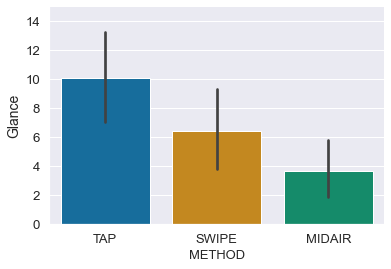

In [18]:
new_modes = ['TAP', 'SWIPE', 'MIDAIR']
cute_plot(df, 'Method', 'Method', new_modes, 'Glance', 'Glance', [0, 15], 'Off-screen Glances Count by Method', False, 'lower left', 13)
# plot_and_save(df, 'Condition', 'Glance', 'Condition', 'Number of Off-screen Glances', 'Off-screen Glances Count by Condition')